# On the angle between the tilt direction and the current

In this notebook we want to see what is the behavior of the current angle as the tilt increases. 

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

from IPython.display import HTML, clear_output
from tqdm import tqdm_notebook

import support as sp

idx = pd.IndexSlice

%reload_ext autoreload
%autoreload 2

In [2]:
mpl.rc('text', usetex=True)
mpl.rcParams['figure.dpi'] = 150

This analysis is done from the data of the simulations with a slit pore of height $h=3.9\mu{}m$

In [3]:
directory = "Z:/Dimers/Simulations/FrequencySweep_3.9/"

diff_vel = pd.read_csv(os.path.join(directory,"differentiated_velocities_cleaner.dat"), sep = "\t", index_col = [0,1,2,3])

In [4]:
diff_vel.head()

x         y
height tilt frequency plane                    
3.9    0.0  0.125     down   0.075122  0.129207
                      up    -0.027868 -0.132720
            0.250     down  -0.185014 -0.194005
                      up     0.164563  0.182301
            0.375     down  -0.134805  0.307006

The `diff_vel` data conains the mean velocity of all particles averaged over time, but separating particles which are close to the upper wall (*up* particles) and particles which are close to the lower wall (*down* particles).
From this data, we will take a frequency slice at $f=3$Hz

In [5]:
f = 3

We define the edge velocity as the velocity of the *up* particles minus the velocity of the *down* particles:

In [6]:
edge_vel = diff_vel.loc[idx[:,:,:,"up"],:].reset_index(level=3,drop=True) - \
    diff_vel.loc[idx[:,:,:,"down"],:].reset_index(level=3,drop=True)

In [7]:
edge_vel["theta"] = np.arctan2(edge_vel.y, edge_vel.x)

In [8]:
tilts = [5, 6, 7, 15]

Text(0, 0.5, '$\\alpha$ [deg]')

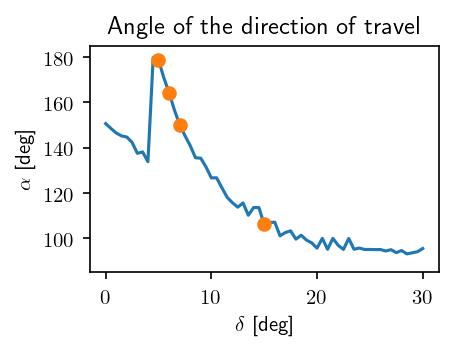

In [9]:
fig = plt.figure(figsize=(3,2))

plt.plot(edge_vel.loc[idx[3.9,:,f],"theta"].index.get_level_values("tilt"),
         np.abs(edge_vel.loc[idx[3.9,:,f],"theta"])*180/np.pi)

plt.plot(edge_vel.loc[idx[3.9,tilts,f],"theta"].index.get_level_values("tilt"),
         np.abs(edge_vel.loc[idx[3.9,tilts,f],"theta"])*180/np.pi,'o')

plt.ylim(85,185)
plt.title("Angle of the direction of travel")
plt.xlabel(r"$\delta$ [deg]")
plt.ylabel(r"$\alpha$ [deg]")
#fig.savefig('angle_vs_tilt.pdf', pad_inches = 0, bbox_inches = "tight")

Weirdly, we see that at the critical point, the relative angle is 180 deg. We expected perpendicular motion. To understand this we will look at some videos. Specifically, we will look at videos at the points marked above, corresponding to the critical field, and two others for comparison. 

However, this angle says nothing of the current, because it gives a value of $\alpha$ even when there is no exchange. Let's weight the line with the total current. 

In [10]:
d = 2.8
phi = 0.2625

freq = diff_vel.index.get_level_values("frequency").unique().values[0]
factor = freq*d*np.sqrt(np.pi/np.sqrt(3)/phi)

def calc_current(series):
    freq = series.index.get_level_values("frequency").unique().values[0]
    factor = freq*d*np.sqrt(np.pi/np.sqrt(3)/phi)
    out = series.loc[idx[:,:,:,"up"],:].reset_index(level=3,drop=True) - \
        series.loc[idx[:,:,:,"down"],:].reset_index(level=3,drop=True)
    
    return pd.DataFrame(data = [np.sqrt(out.x.values**2+out.y.values**2)/(factor)], columns = ["I"])

In [11]:
edge_vel["current"] = diff_vel.groupby(["height","tilt","frequency"]).apply(calc_current).reset_index(level=3,drop=True)

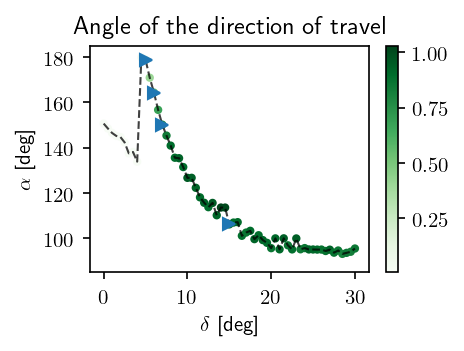

In [12]:
fig = plt.figure(figsize=(3,2))

plt.plot(edge_vel.loc[idx[3.9,:,f],"theta"].index.get_level_values("tilt"),
         np.abs(edge_vel.loc[idx[3.9,:,f],"theta"])*180/np.pi,
         "--", linewidth = 1, color="black", alpha = 0.75)

plt.plot(edge_vel.loc[idx[3.9,tilts,f],"theta"].index.get_level_values("tilt"),
         np.abs(edge_vel.loc[idx[3.9,tilts,f],"theta"])*180/np.pi,'>')

plt.scatter(edge_vel.loc[idx[3.9,:,f],"theta"].index.get_level_values("tilt"),
            np.abs(edge_vel.loc[idx[3.9,:,f],"theta"])*180/np.pi,
            marker='.', cmap = "Greens",
            c = edge_vel.loc[idx[3.9,:,f],"current"])

plt.ylim(85,185)
plt.title("Angle of the direction of travel")
plt.xlabel(r"$\delta$ [deg]")
plt.ylabel(r"$\alpha$ [deg]")
plt.colorbar()
#fig.savefig('angle_vs_tilt.pdf', pad_inches = 0, bbox_inches = "tight")

# Videos of currents at different tilts. 

The location of specific videos is saved in the *index.dat*. 

In [13]:
index_name = "index.dat"

index = pd.read_csv(os.path.join(directory,index_name),sep=" ", names = ["file","height","tilt"])
index.head()

,file,height,tilt
0,Tilt_2.0_deg_h3899_2019_09_25_17_17_30,3.9,2.0
1,Tilt_16.5_deg_h3899_2019_09_25_17_17_30,3.9,16.5
2,Tilt_4.5_deg_h3899_2019_09_25_17_17_30,3.9,4.5
3,Tilt_1.5_deg_h3899_2019_09_25_17_17_30,3.9,1.5
4,Tilt_14.0_deg_h3899_2019_09_25_17_17_30,3.9,14.0


These are the videos which correspond to the tilts that we marked above in the plot. 

In [14]:
index[index.tilt.isin(tilts)]

,file,height,tilt
16,Tilt_5.0_deg_h3899_2019_09_25_17_17_30,3.9,5.0
24,Tilt_6.0_deg_h3899_2019_09_25_17_17_30,3.9,6.0
26,Tilt_7.0_deg_h3899_2019_09_25_17_17_30,3.9,7.0
32,Tilt_15.0_deg_h3899_2019_09_25_17_17_30,3.9,15.0


In [15]:
%%time 

video_slow = []
video_fast = []

for i in tqdm_notebook(range(len(tilts))):
    
    name = index.loc[index.tilt==tilts[i],"file"].values[0]
    trj, bounds = sp.load_trj_single_freq(name,directory,f)

    video_slow.append(sp.make_video_slowmo(name,trj,bounds))
    video_fast.append(sp.make_video_fastmo(name,trj,bounds))


Wall time: 14min 13s


## Very close to the critical tilt

In [16]:
i = 0
tilts[i]

5

In [17]:
HTML("""<div class="row">
  <div class="col-sm-6">%s</div>
  <div class="col-sm-6">%s</div>
</div>"""%(video_slow[i],video_fast[i]))

In this case the current is nearly zero. We can see however some cases of exchanges which occur close to $\alpha = 180º$

## A little further

In [18]:
i = 1
tilts[i]

6

In [19]:
HTML("""<div class="row">
  <div class="col-sm-6">%s</div>
  <div class="col-sm-6">%s</div>
</div>"""%(video_slow[i],video_fast[i]))

Some clear indication of a current exists in this videos, and it occurs mostly horizontally. 

## A little further

In [20]:
i = 2
tilts[i]

7

In [21]:
HTML("""<div class="row">
  <div class="col-sm-6">%s</div>
  <div class="col-sm-6">%s</div>
</div>"""%(video_slow[i],video_fast[i]))

Here we already see a fully formed current state. The direction of the current is very close to parallel to the tilt angle. 

## A lot further

In [22]:
i = 3
tilts[i]

15

In [23]:
HTML("""<div class="row">
  <div class="col-sm-6">%s</div>
  <div class="col-sm-6">%s</div>
</div>"""%(video_slow[i],video_fast[i]))

Here we already see a fully formed current state. The direction of the current is very close to parallel to the tilt angle. 

# Tilt direction 

from a trajectory we can obtain the instantaneous field to ensure that the tilt is actually in the x direction. As a sample dataset I will use the $\delta=7º$ data from the video above.

In [24]:
name = index.loc[index.tilt==7,"file"].values[0]
trj, bounds = sp.load_trj_single_freq(name,directory,f)

In [25]:
field = trj.filter(["mux","muy","muz"]).groupby("frame").mean()

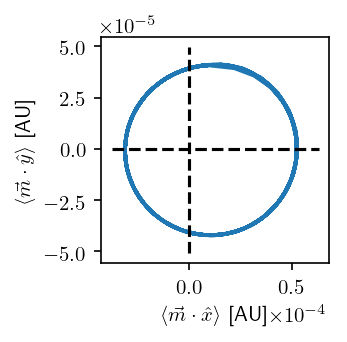

In [26]:
fig = plt.figure(figsize=[2,2])
plt.ticklabel_format(style="sci",scilimits=(0,0))
plt.plot(field.mux,field.muy)
plt.plot([0,0],[1.2*field.muy.min(),1.2*field.muy.max()],"--",color = "black")
plt.plot([1.2*field.mux.min(),1.2*field.mux.max()],[0,0],"--",color = "black")
plt.axis("scaled");
plt.xlabel(r"$\left<\vec{m}\cdot\hat{x}\right>$ [AU]")
plt.ylabel(r"$\left<\vec{m}\cdot\hat{y}\right>$ [AU]");

In the plot above we show the average magnetic moment as a function of time. The function traces a circle centered to the left of the origin, marked by the dotted lines. This shows that indeed, the tilt direction is on the $x$ axis.  